---
title: "StockX"

author: "Pedro Silva"

date: "11/23/2021"

---


  This dataset was given by StockX for their annual data contest in 2019. I have not used the dataset to follow StockX's rules for submission. I am using it to display some of my Exploratory Data Analysis skills.

### Install Packages

In [1]:
install.packages('tidyverse')
install.packages('janitor')
library(tidyverse)
library(ggplot2)
library(janitor)
library(lubridate)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘janitor’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Att

### Import Data

In [2]:
stockx <- read.csv("../input/stockx-data-contest/StockX-Data-Contest-2019-3.csv", stringsAsFactors = FALSE)

### Clean Data

#### Clean Colum Names

In [3]:
stockx <- stockx %>% 
  clean_names()

#### Format Data Types

In [4]:
stockx2 <- stockx %>% 
  mutate(order_date = as.Date(order_date, format = "%m/%d/%Y")) %>% 
  mutate(sale_price = parse_number(sale_price)) %>% 
  mutate(retail_price = parse_number(retail_price)) %>% 
  mutate(release_date = as.Date(release_date, format = "%m/%d/%Y")) %>% 
  mutate(shoe_size = as.numeric(shoe_size))

#### Add information for Analysis

In [5]:
stockx2$weeks <- round(difftime(stockx2$order_date, stockx2$release_date, units = "weeks"))
stockx2$day_of_week <- format(as.Date(stockx2$order_date), "%A")
stockx2$profit <- stockx2$sale_price - stockx2$retail_price
stockx2$profit_perc <- round((stockx2$profit/stockx2$retail_price)*100)

### Inspect Data

#### Check for Incomplete Data

In [6]:
sapply(stockx2, function(x) sum(is.na(x)))
sapply(stockx2, function(x) sum(x<=0))

order_date        brand sneaker_name   sale_price retail_price release_date 
           0            0            0            0            0            0 
   shoe_size buyer_region        weeks  day_of_week       profit  profit_perc 
           0            0            0            0            0            0

order_date        brand sneaker_name   sale_price retail_price release_date 
       99956        72162            0            0            0        99956 
   shoe_size buyer_region        weeks  day_of_week       profit  profit_perc 
           0            0        15293            0          887          957

 I am now sure there are no missing values. And none of the values under zero are prices or shoe sizes.

#### Check for inconsistencies in dates

In [7]:
stockx2 %>% 
  select(order_date, release_date) %>% 
  summary()

   order_date        release_date     
 Min.   :17-09-01   Min.   :15-06-27  
 1st Qu.:18-05-02   1st Qu.:17-09-09  
 Median :18-09-24   Median :17-12-16  
 Mean   :18-08-12   Mean   :18-02-10  
 3rd Qu.:18-12-15   3rd Qu.:18-08-03  
 Max.   :19-02-13   Max.   :19-02-07  

#### Check Min and Max for inconsistencies

In [8]:
stockx2 %>% 
  select(sale_price, retail_price, shoe_size) %>% 
  summary()

   sale_price      retail_price     shoe_size     
 Min.   : 186.0   Min.   :130.0   Min.   : 3.500  
 1st Qu.: 275.0   1st Qu.:220.0   1st Qu.: 8.000  
 Median : 370.0   Median :220.0   Median : 9.500  
 Mean   : 446.6   Mean   :208.6   Mean   : 9.344  
 3rd Qu.: 540.0   3rd Qu.:220.0   3rd Qu.:11.000  
 Max.   :4050.0   Max.   :250.0   Max.   :17.000  

#### Check how many brands reported

In [9]:
stockx2 %>% 
  select(brand) %>% 
  group_by() %>% 
  distinct()

brand
<chr>
Yeezy
Off-White


#### How many shoes reported

In [10]:
stockx2 %>% 
  select(sneaker_name) %>% 
  distinct() %>% 
  count()

n
<int>
50


#### How many shoes per brand

In [11]:
stockx2 %>% 
  select(brand, sneaker_name) %>% 
  group_by(brand) %>% 
  distinct() %>% 
  count()

brand,n
<chr>,<int>
Yeezy,20
Off-White,30


#### How many buyer regions

In [12]:
stockx2 %>% 
  select(buyer_region) %>% 
  distinct() %>% 
  count()

n
<int>
51


#### Where are the buyer regions

In [13]:
stockx2 %>% 
  select(buyer_region) %>% 
  group_by(buyer_region) %>% 
  distinct() %>% 
  arrange(buyer_region)

buyer_region
<chr>
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia


 I noticed it had 51 "regions" which I assumed were states. However, upon further investigation I noticed the data has listed Distric of Columbia as a region, which is not a US State.

### Analyze Data

#### Total sales per brand

In [14]:
stockx2 %>% 
  group_by(brand) %>% 
  count()

brand,n
<chr>,<int>
Yeezy,72162
Off-White,27794


#### Total sales per sneaker 

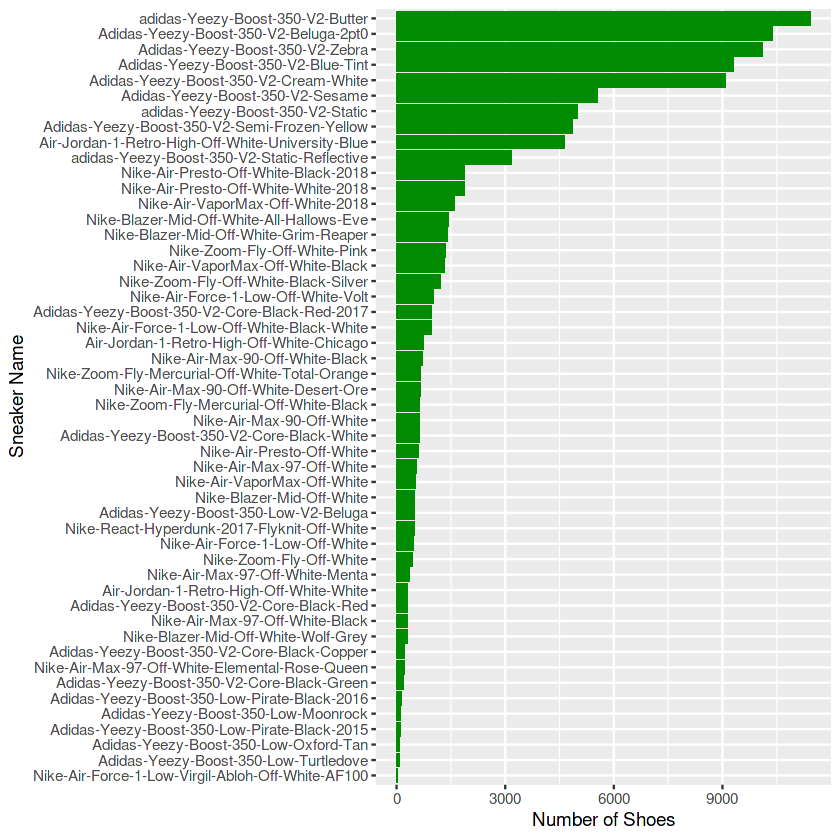

In [15]:
stockx2 %>% 
  count(sneaker_name) %>% 
  mutate(sneaker_name = fct_reorder(sneaker_name, n)) %>% 
  ggplot(aes(sneaker_name, n))+
  geom_col(fill="green4")+
  labs(x="Sneaker Name", y="Number of Shoes")+
  coord_flip()

#### Total sale per state (number of shoes)

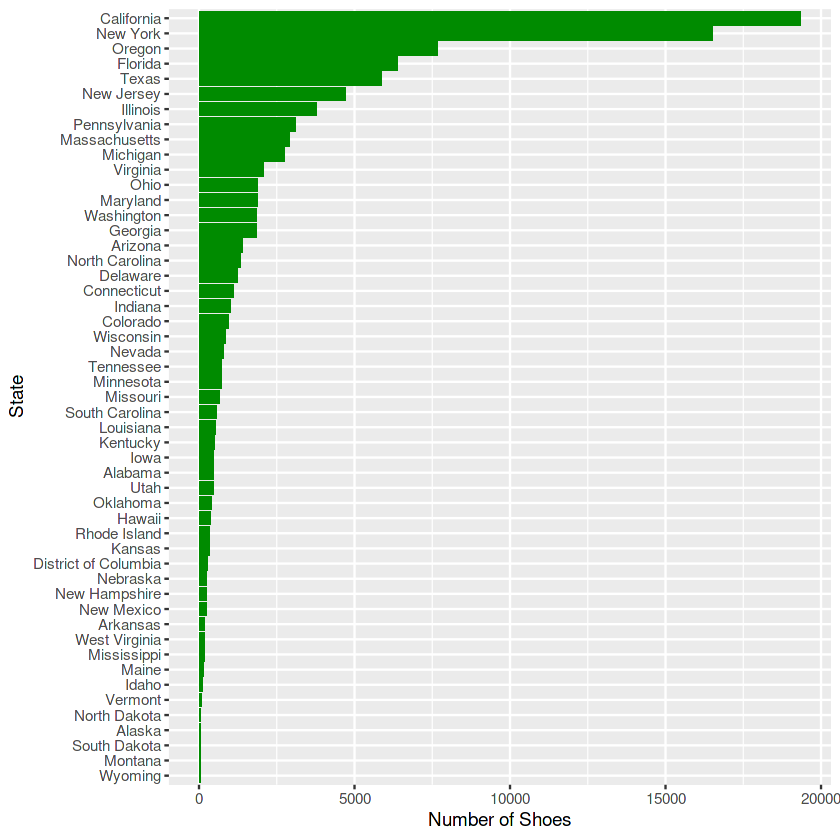

In [16]:
stockx2 %>% 
  group_by(buyer_region) %>% 
  count() %>% 
  ggplot(aes(reorder(buyer_region, n), n))+
  geom_col(fill="green4")+
  labs(x="State", y="Number of Shoes")+
  coord_flip()

#### Total sale per state (total sum)

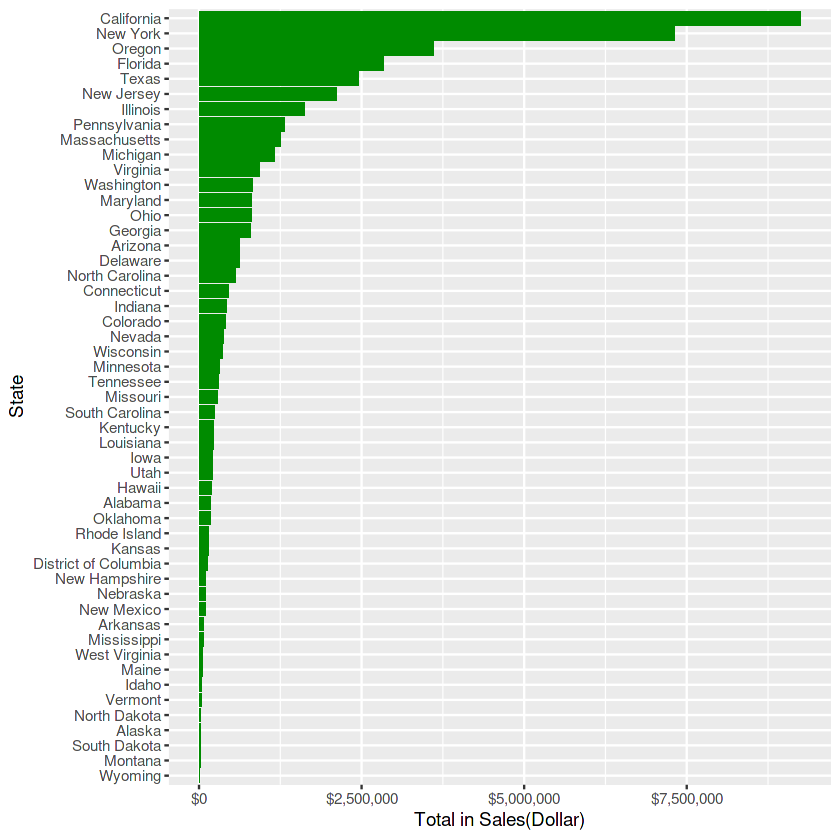

In [17]:
stockx2 %>% 
  group_by(buyer_region) %>% 
  summarise(total_purchased = sum(sale_price)) %>% 
  ggplot(aes(reorder(buyer_region, total_purchased), total_purchased))+
  geom_col(fill="green4")+
  scale_y_continuous(labels = scales::dollar_format())+
  labs(x="State", y="Total in Sales(Dollar)")+
  coord_flip()

#### Average sale price per state

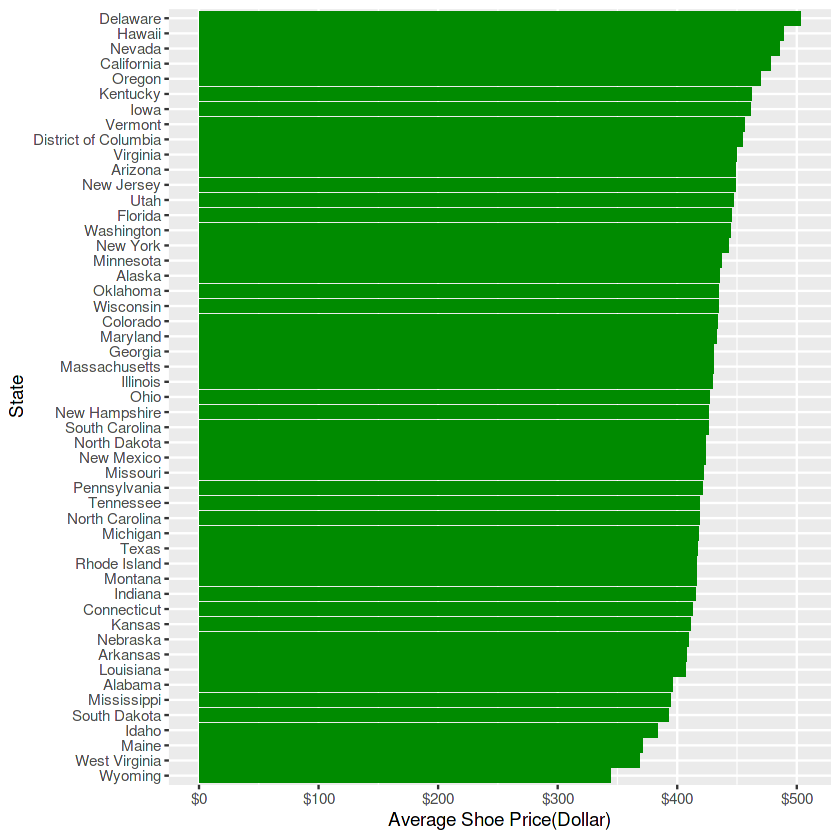

In [18]:
stockx2 %>% 
  group_by(buyer_region) %>% 
  summarise(avg_purchased = mean(sale_price)) %>% 
  ggplot(aes(reorder(buyer_region, avg_purchased), avg_purchased))+
  geom_col(fill="green4")+
  scale_y_continuous(labels = scales::dollar_format())+
  labs(x="State", y="Average Shoe Price(Dollar)")+
  coord_flip()

#### Which state bought the most expensive shoes

In [19]:
stockx2 %>% 
  select(buyer_region, sneaker_name, sale_price) %>% 
  arrange(-sale_price) %>% 
    head()

,buyer_region,sneaker_name,sale_price
,<chr>,<chr>,<dbl>
1,Wisconsin,Air-Jordan-1-Retro-High-Off-White-Chicago,4050
2,New York,Air-Jordan-1-Retro-High-Off-White-Chicago,3700
3,New Jersey,Air-Jordan-1-Retro-High-Off-White-University-Blue,3680
4,New York,Air-Jordan-1-Retro-High-Off-White-Chicago,3500
5,California,Air-Jordan-1-Retro-High-Off-White-Chicago,3400
6,New York,Air-Jordan-1-Retro-High-Off-White-Chicago,3396


#### Which state bought the cheapest shoes

In [20]:
stockx2 %>% 
  select(buyer_region, sneaker_name, sale_price) %>% 
  arrange(sale_price) %>% 
    head()

,buyer_region,sneaker_name,sale_price
,<chr>,<chr>,<dbl>
1,New Jersey,Adidas-Yeezy-Boost-350-V2-Sesame,186
2,New York,adidas-Yeezy-Boost-350-V2-Butter,190
3,California,adidas-Yeezy-Boost-350-V2-Butter,191
4,California,adidas-Yeezy-Boost-350-V2-Butter,194
5,Colorado,adidas-Yeezy-Boost-350-V2-Butter,195
6,Maryland,adidas-Yeezy-Boost-350-V2-Butter,195


#### Average shoe size by state

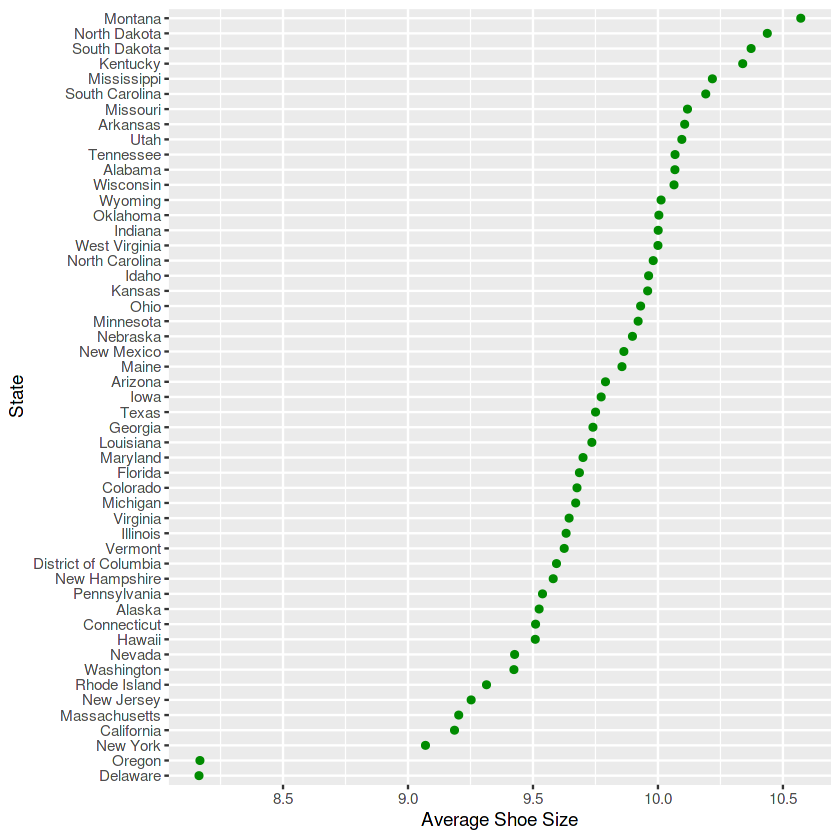

In [21]:
stockx2 %>% 
  select(buyer_region,shoe_size) %>% 
  group_by(buyer_region) %>% 
  summarise(avg_shoe_size = mean(shoe_size)) %>% 
  ggplot(aes(reorder(buyer_region, avg_shoe_size), avg_shoe_size))+
  geom_point(color="green4")+
  labs(x="State", y="Average Shoe Size")+
  coord_flip()

#### Total number of sales per shoe size

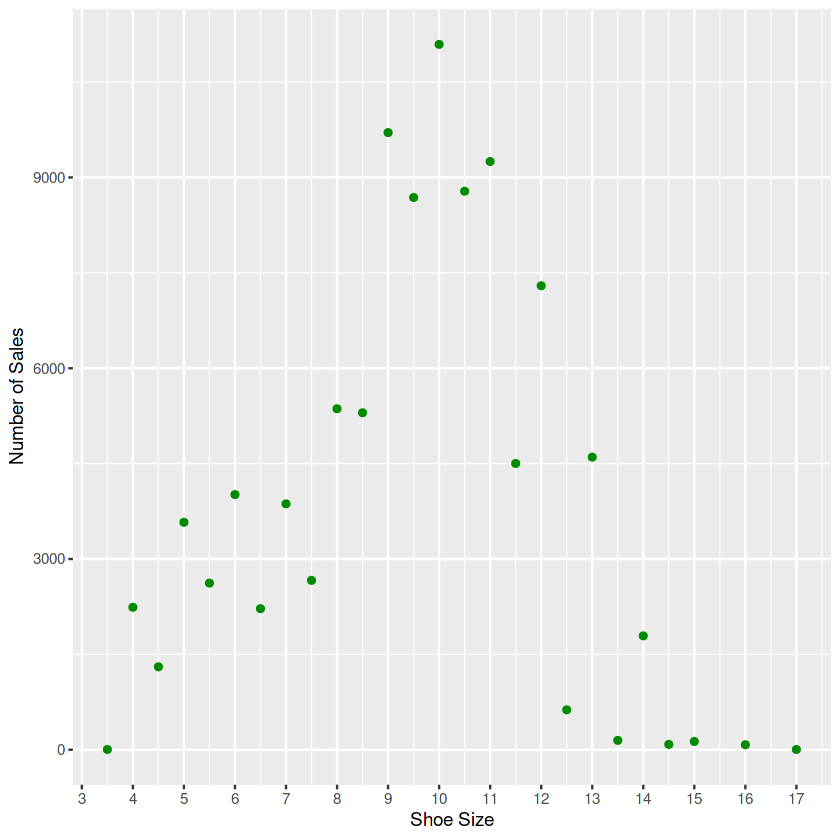

In [22]:
stockx2 %>% 
  group_by(shoe_size) %>% 
  count() %>% 
  ggplot(aes(shoe_size, n))+
  geom_point(color="green4")+
  scale_x_continuous(breaks = 3:17)+
  labs(x="Shoe Size", y="Number of Sales")

#### Shoe size with the most percent of profit

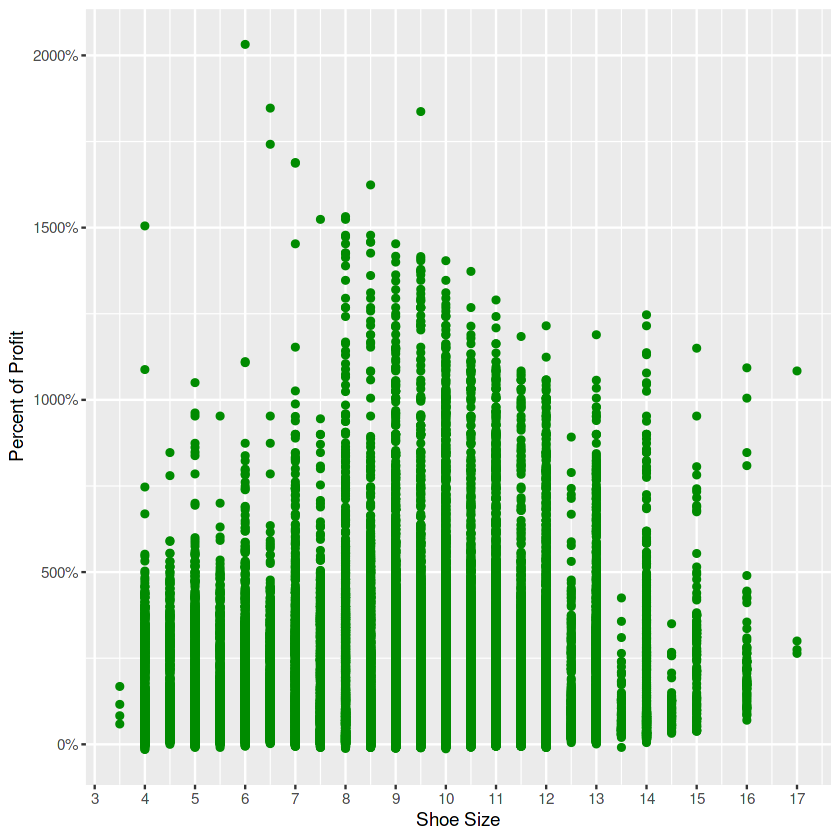

In [23]:
stockx2 %>% 
  select(shoe_size, profit_perc) %>% 
  group_by(shoe_size) %>% 
  ggplot(aes(x=shoe_size, y=profit_perc))+
  geom_point(color="green4")+
  scale_x_continuous(breaks = 3:17)+
  scale_y_continuous(labels=function(x) paste0(x,"%"))+
  labs(x="Shoe Size", y="Percent of Profit")

#### Average profit percentage per shoe size

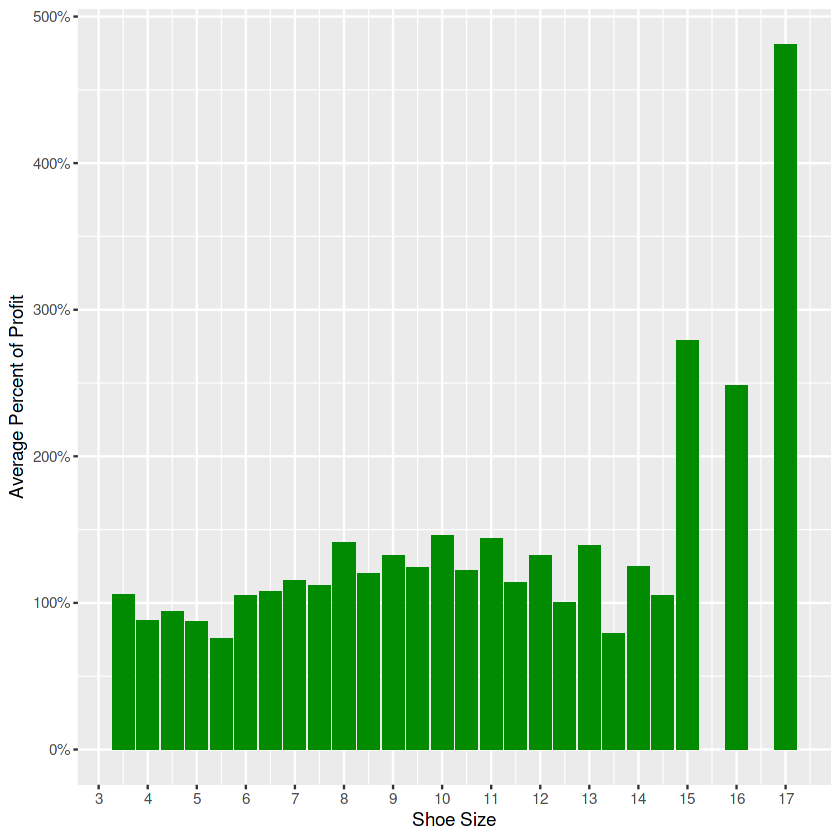

In [24]:
stockx2 %>% 
  select(shoe_size, profit_perc) %>% 
  group_by(shoe_size) %>% 
  summarise(avg_profit_perc = round(mean(profit_perc))) %>% 
  ggplot(aes(x=shoe_size, y=avg_profit_perc))+
  geom_col(fill="green4")+
  scale_x_continuous(breaks = 3:17)+
  scale_y_continuous(labels=function(x) paste0(x,"%"))+
  labs(x="Shoe Size", y="Average Percent of Profit")

#### What is the average sale price per shoe size

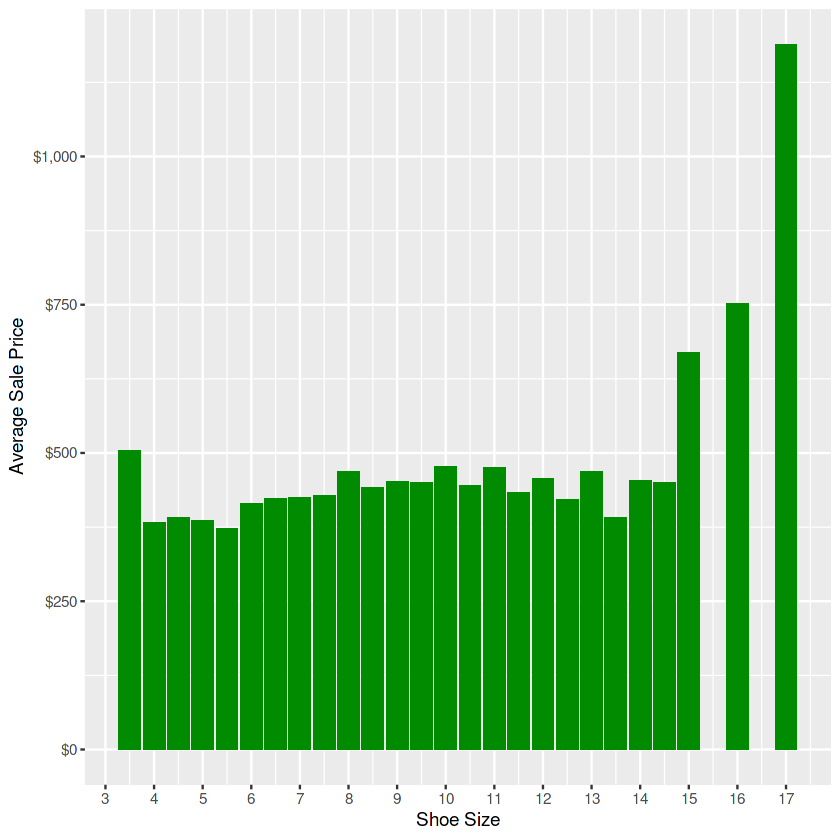

In [25]:
stockx2 %>% 
  select(shoe_size, sale_price) %>% 
  group_by(shoe_size) %>% 
  summarise(avg_sale_price = round(mean(sale_price))) %>% 
  ggplot(aes(x=shoe_size, y=avg_sale_price))+
  geom_col(fill="green4")+
  scale_x_continuous(breaks = 3:17)+
  scale_y_continuous(labels = scales::dollar_format())+
  labs(x="Shoe Size", y="Average Sale Price")

#### which shoes were sold for a loss

In [26]:
stockx2 %>% 
  select(brand, sneaker_name, retail_price, sale_price) %>% 
  group_by(sneaker_name) %>% 
  filter(sale_price < retail_price) %>% 
  summarise(avg_retail = mean(retail_price), avg_sale = mean(sale_price)) %>% 
  arrange(avg_sale)

sneaker_name,avg_retail,avg_sale
<chr>,<dbl>,<dbl>
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,220,200.0000
Adidas-Yeezy-Boost-350-V2-Sesame,220,208.3333
adidas-Yeezy-Boost-350-V2-Butter,220,210.3633
Adidas-Yeezy-Boost-350-V2-Cream-White,220,212.2664
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,220,214.0000


#### When were shoes sold for a loss

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



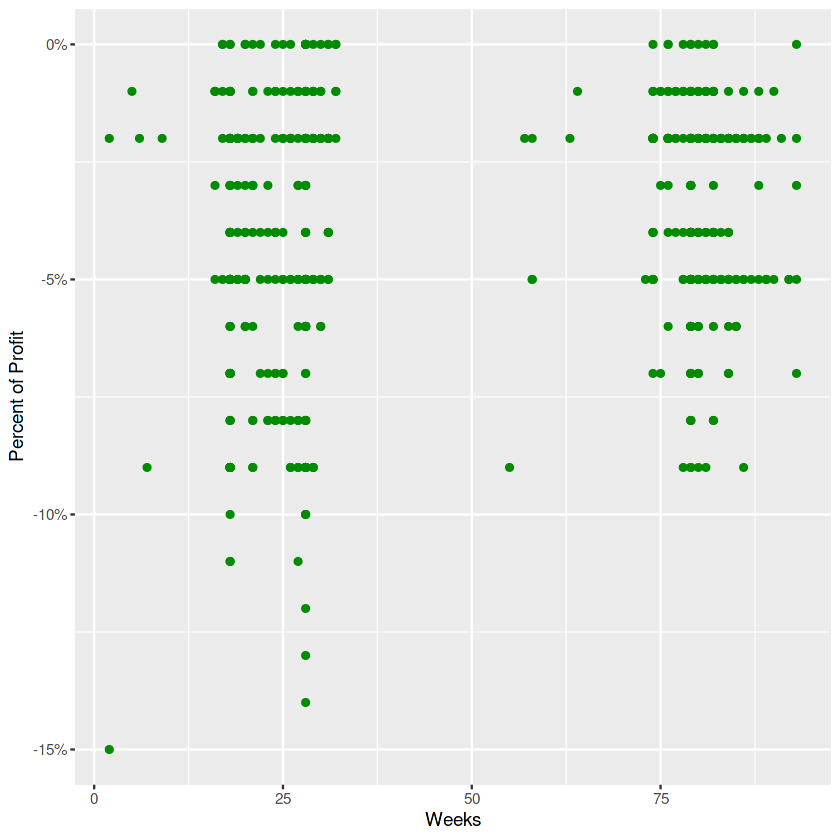

In [27]:
stockx2 %>% 
  filter(sale_price < retail_price) %>% 
  ggplot(aes(x=weeks, y=profit_perc))+
  geom_point(color="green4")+
  scale_y_continuous(labels=function(x) paste0(x,"%"))+
  labs(x="Weeks", y="Percent of Profit")

#### When were shoes sold for most profit

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



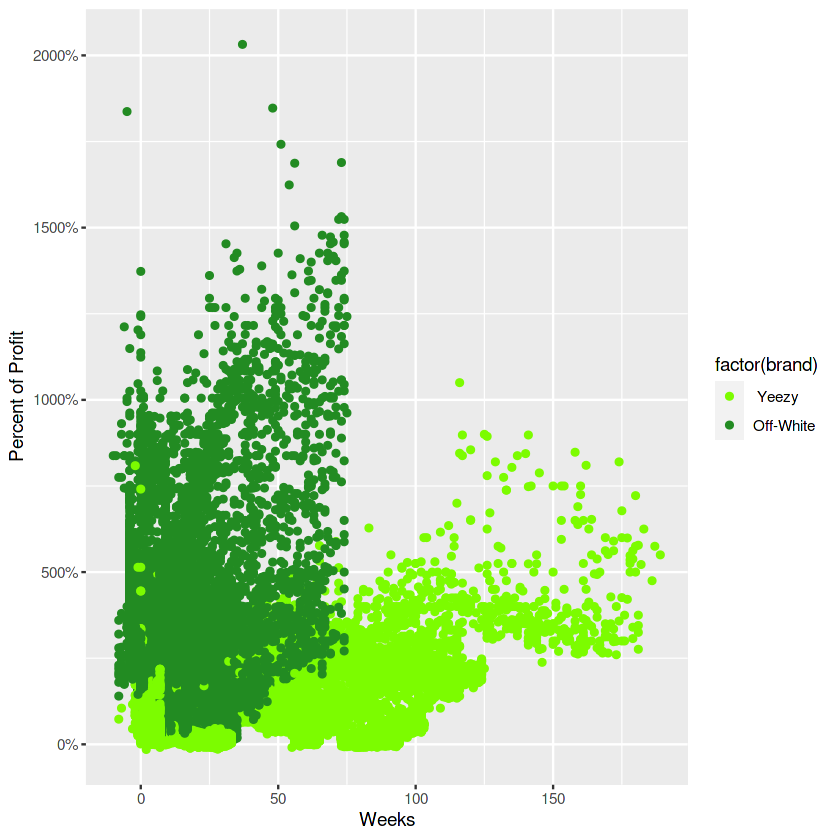

In [28]:
stockx2 %>% 
  ggplot(aes(x=weeks, y=profit_perc, color=factor(brand)))+
  geom_point()+
  scale_colour_manual(values = c("#7CFC00", "#228B22"))+
  scale_y_continuous(labels=function(x) paste0(x,"%"))+
  labs(x="Weeks", y="Percent of Profit")

#### When were most shoes sold

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



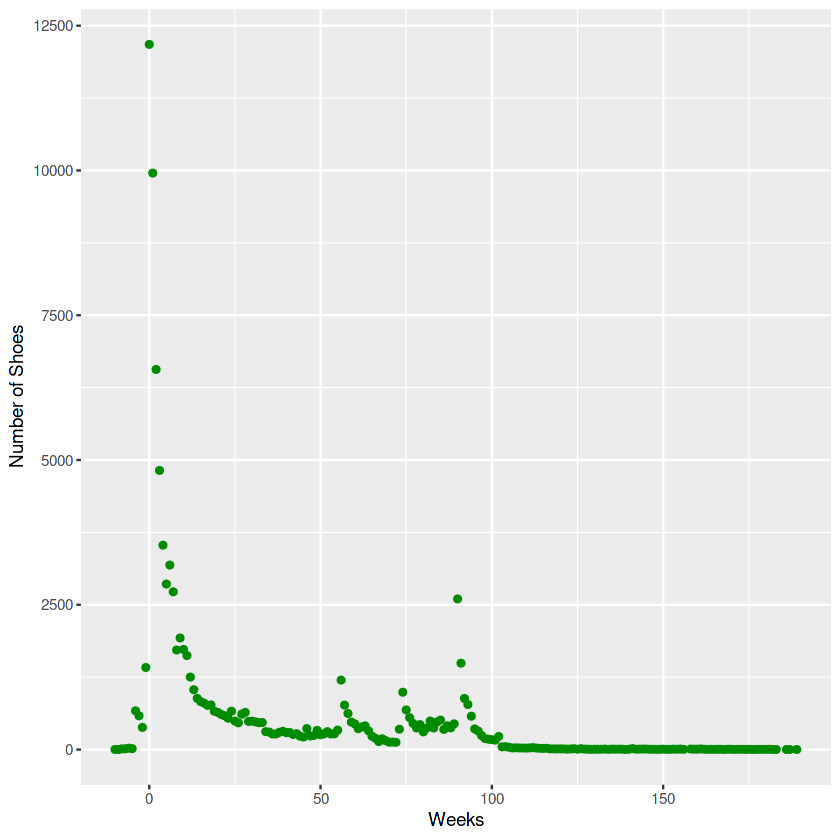

In [29]:
stockx2 %>% 
  group_by(weeks) %>% 
  count() %>% 
  ggplot(aes(weeks, n))+
  geom_point(color="green4")+
  labs(x="Weeks", y="Number of Shoes")

#### Which day of the week sells most shoes

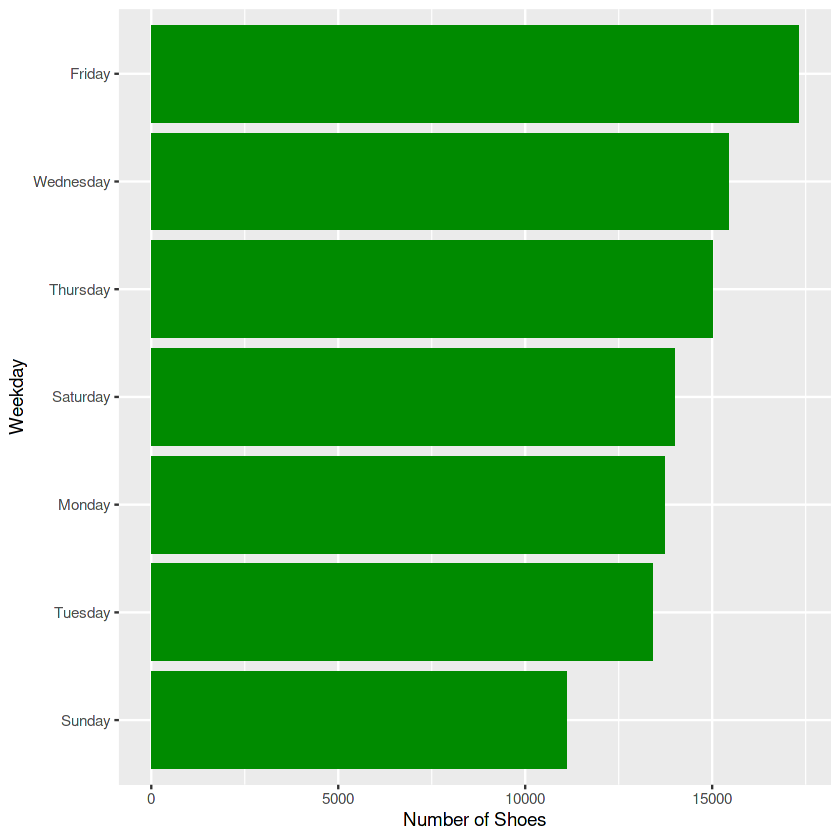

In [30]:
stockx2 %>% 
  group_by(day_of_week) %>% 
  count() %>% 
  ggplot(aes(reorder(day_of_week, n), n))+
  geom_col(fill="green4")+
  labs(x="Weekday", y="Number of Shoes")+
  coord_flip()

#### Which day of the week sells for most average profit

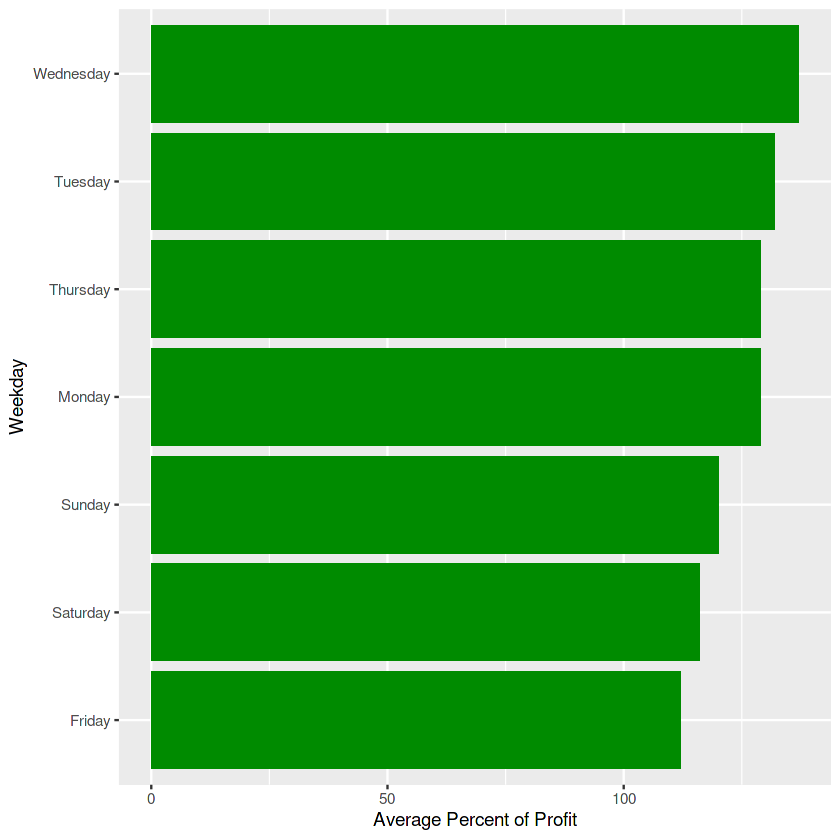

In [31]:
stockx2 %>% 
  group_by(day_of_week) %>% 
  summarise(avg_profit_perc = round(mean(profit_perc))) %>% 
  ggplot(aes(reorder(x=day_of_week, avg_profit_perc), y=avg_profit_perc))+
  geom_col(fill="green4")+
  labs(x="Weekday", y="Average Percent of Profit")+
  coord_flip()

### Insights

  Though I did not start the EDA process with a specific business objective to answer. I was able to examine and data set and observe the following insights.

- Winsconsin has the lowest average sale price, but bought the most expensive shoe.
- Montana has the biggest average shoe size.